<h1><center>California Public K-12 Construction Spending: an Overview</center></h1>

By Sophie McGuinness and Ben Hendel

# Introduction:#
School construction spending in the United States is only just beginning to be understood. Most studies of school construction study its impact on property values and student success rates, using only aggregate construction cost data. No studies have addressed the qualitative content of the construction (did they build a gymnasium or classroom?), or have looked across races served by school construction. We believe understanding the behavior of school construction in these areas is an important first step in determining how students and communities are effected, and how legislators can change public policy to accomodate their needs. 

Additionally, few studies have focused on construction spending in California specifically. California is an excellent state in which to study school construction because it is one of the largest and most racially diverse states in America. The data that we have has gone previously unexplored, and its insights into California's spending habits will likely be relevant to many other states. 

This report will pay special attention to factors that indicate how modern a school is. We will analyze projects that include the word 'modernization,' as well as those that included solar panel installation. California is renewing focus on equipping schools to prepare students to enter STEM feilds, and these metrics may help us understand the current state of these efforts

# Data and Pre-Processing:
The data set used is a 27 variable, 55,000 entry administrative dataset from the State of California Department of Education. 

In order to clean and restructure the data, I assigned school ID's to the school names and coded flags for construction types contained in the variable 'projectscope,' the variable that denotes the content of the construction. Because we did not go over regex commands in this class, I used Stata to look for keywords like 'classroom' or 'bathroom' within projectscope, and sorted them into qualitative categories. The categories include educational buildings, community buildings, and general facilities (such as bathrooms or flooring). I also coded whether the construction type was an alteration, repair, relocation, or rehabilitation. 

Another process that needed to happen to make the data usable was to use regex to assign ID numbers to each school. The school and district names and the project scope variable were all entered by hand, meaning there were a lot of typos in the original data. I had to make sure all school names were consistent by fixing these typos and assigning numerical IDs. Once I had the IDs assigned, I merged in school demographic data from the National Center for Education Statistics. This was important not only for tracking racial demographics of schools, but also to merge in schools who didn't receive construction in a given year. Because my data only includes schools who received construction, it was important to add in the other schools who weren't given construction projects. 

All data pre processing files can be found in my github repostitory. They are all stata.do files.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import matplotlib.patches as mpatches
import numpy as np
from pylab import *
import seaborn as sns
sns.set(style="whitegrid")

school_data = pd.read_csv("final_141b.csv")
total_demographics = pd.read_csv("total_demographics.csv")
school_data['newdistcode'].astype(str)
school_data.columns

/Users/SophieMcG/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,5,8,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'projectname', u'clientname', u'projectscope', u'yr_opened',
       u'yr_closed', u'newdistcode', u'newschoolid', u'Tentative',
       u'observation_date', u'CPI_estamount', u'CPI_contamount',
       u'CPI_changeamt', u'CPI_closedamount', u'calculated_cost', u'yr_op1',
       u'ctwhite', u'ctblack', u'cthispanic', u'ctReduced_lunch',
       u'genenrollment', u'distkids', u'distctwhite', u'distctblack',
       u'distcthispanic', u'distctReduced_lunch', u'CPI_perstu',
       u'CPIdist_kid', u'NotContracted', u'maybecanceled', u'edu_building',
       u'career_tech', u'community1', u'community2', u'gen_facilities',
       u'admin', u'new', u'modern', u'clean_scope', u'const', u'alt',
       u'reconst', u'repair', u'relocate', u'rehab', u'career_techspending',
       u'edu_buildingspending', u'community1spending', u'community2spending',
       u'gen_facilitiesspending', u'adminspending', u'career_techstudent',
       u'edu_buildingstudent', u'community1student', u'community2student'

In [3]:
#Adding tags for project types
modern = school_data['modern'] == 1
not_tentative = school_data['Tentative'] == 0
not_canceled = school_data['maybecanceled'] == 0
canceled = school_data['maybecanceled'] == 1
repair = school_data['repair'] == 1
new = school_data['new'] == 1

school_data = school_data[not_canceled][not_tentative]

/Users/SophieMcG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


# Summary Statistics:#
Before delving deeper into the data, the following four graphs give an idea of how construction spending and public school enrollment demographics have changed over time. The first graph shows the behavior of school construction spending since 1995 by plotting the sum of construction spending per student. The second shows the raw overall sum of construction spending. Both graphs show peak spending around 2005, with a significant tapering down approaching 2017. 

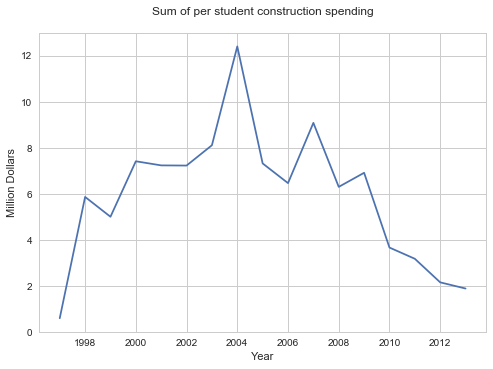

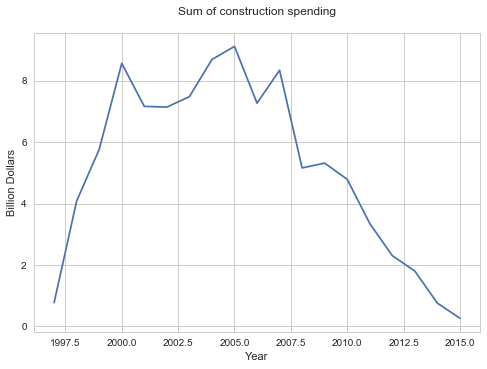

In [4]:
#Summary statistics -- Very general
not16 = school_data['yr_op1'] != 2016
collapse_year = school_data[not16].groupby(['yr_op1'])

plt.plot(collapse_year.CPI_perstu.sum()/1000000)
plt.title("Sum of per student construction spending\n")
plt.ylabel("Million Dollars")
plt.xlabel("Year")
plt.show()

plt.plot(collapse_year.calculated_cost.sum()/1000000000)
plt.title("Sum of construction spending\n")
plt.ylabel("Billion Dollars")
plt.xlabel("Year")
plt.show()

The next two graphs give a breif overview of the demographics of California public schools. The first graph shows a steep incline in public school enrollment, which has begun to level out since 2005. In terms of racial demographics, Hispanic, Other races, and students who qualify for free or reduced price lunch have shown steady upward trends. White and black students are showing a steady decline.

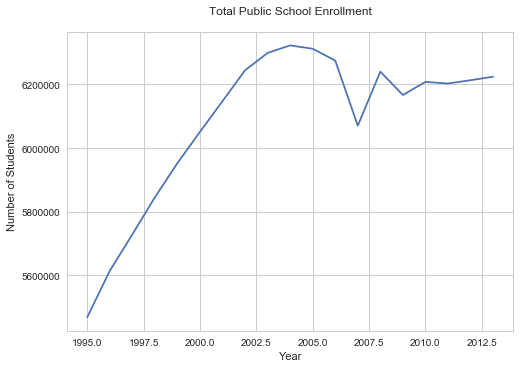

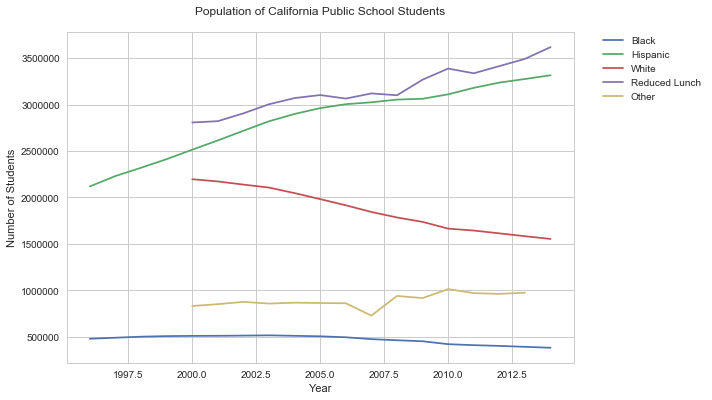

In [5]:
not12 = total_demographics['yr_op1'] != 2012
collapse_year_demog = total_demographics.groupby(['yr_op1'])
collapse_year_demog_not12 = total_demographics[not12].groupby(['yr_op1'])

def calc_other(dataset):
    other = dataset.genenrollment.sum() - (dataset.ctblack.sum() + dataset.ctwhite.sum()+dataset.cthispanic.sum())
    return other

plt.plot(collapse_year_demog.genenrollment.sum())
plt.title("Total Public School Enrollment\n")
plt.ylabel("Number of Students")
plt.xlabel("Year")
plt.show()

plt.plot(collapse_year_demog.ctblack.sum())
plt.plot(collapse_year_demog.cthispanic.sum())
plt.plot(collapse_year_demog.ctwhite.sum())
plt.plot(collapse_year_demog_not12.ctReduced_lunch.sum())
plt.plot(calc_other(collapse_year_demog))
plt.legend(('Black', 'Hispanic', 'White', 'Reduced Lunch', 'Other'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Number of Students")
plt.xlabel("Year")
plt.title("Population of California Public School Students\n")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

# Potential Racial Disparity
The following three scatter plots show the percentage of each race demographic on the Y axis, and the amount spent per student on the X axis. It hints at a racial disparity between black students and white and hispanic students. The closer a school gets to 100% black students, the lower the amount spent per student seems to be. This pattern does not obviously repeat itself in the scatter plots for white and hispanic students. 

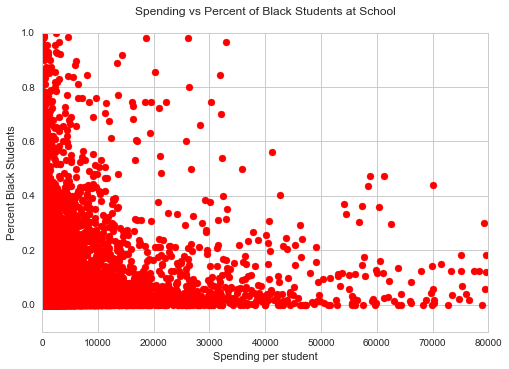

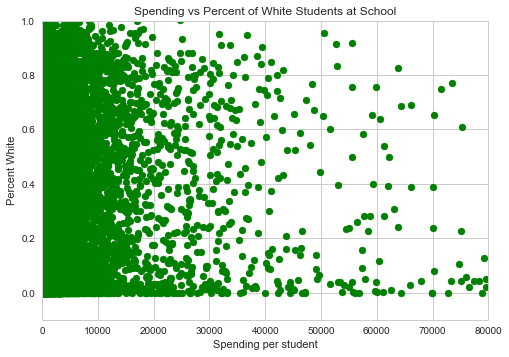

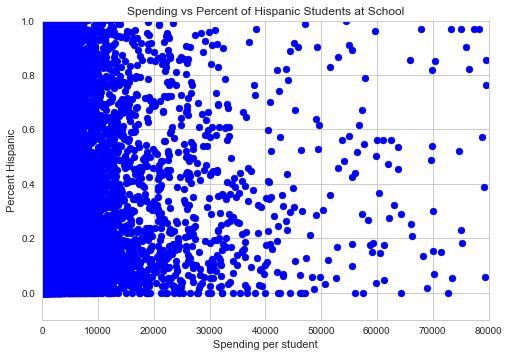

In [6]:
def scatter(spending, demog, color, ylab, title):
    plt.scatter(spending, demog, c = color)
    plt.xlabel("Spending per student")
    plt.ylabel(ylab)
    plt.title(title)
    plt.xlim(0, 80000)
    plt.ylim(-.1, 1)
    plt.show() 

scatter(school_data.CPI_perstu, school_data.perblack, 'r', "Percent Black Students","Spending vs Percent of Black Students at School\n")
scatter(school_data.CPI_perstu, school_data.perwhite, 'g', "Percent White","Spending vs Percent of White Students at School")
scatter(school_data.CPI_perstu, school_data.perhisp, 'b', "Percent Hispanic","Spending vs Percent of Hispanic Students at School")

# Project Categories#
The following two graphs show the trends in types of construction spending over time. I expected community buildings to be the most expensive per student because of how large projects like libraries and gymnasiums are. This hypothesis was incorrect, and community buildings turned out to be one of the lowest spending categories. Curiously, administrative construction spending appeared to be the highest. 

Community buildings have the lowest number of overall projects likely because they consist of larger projects. Administrative projects make up the second least common projects, suggesting that they don't occur at schools often, but when they do they are expensive, given that they are the top most expensive spending category. It appears that the number of general facilities projects, which are typically the lowest cost and most numerous projects, exceeded the number of educational building projects in the year 2007. All categories in spending and count show a steady decline over time. 

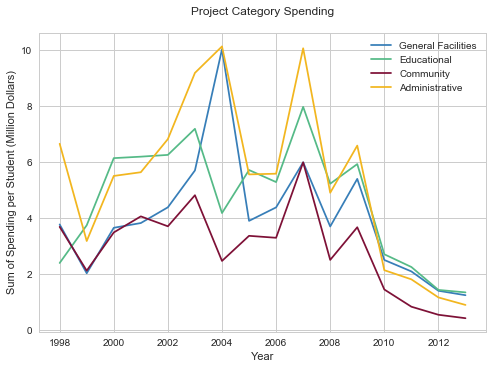

/Users/SophieMcG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


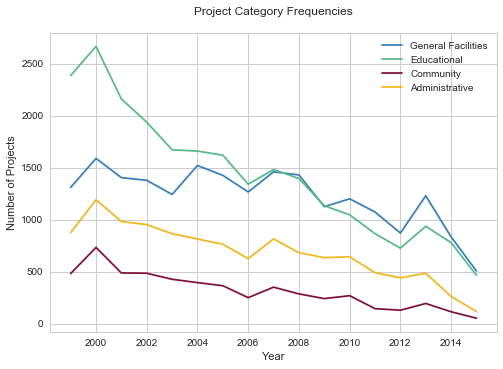

In [18]:
not97 = school_data['yr_op1'] != 1997
under98 = school_data['yr_op1'] > 1998
collapse_year = school_data[not97].groupby(['yr_op1'])

plt.title("Project Category Spending\n")
plt.plot(collapse_year.gen_facilitiesspending.sum()/1000000, '#377EB8')
plt.plot(collapse_year.edu_buildingspending.sum()/1000000,  '#55BA87')
plt.plot(collapse_year.adminspending.sum()/1000000, '#7E1137')
plt.plot((collapse_year.community1spending.sum() + collapse_year.community2spending.sum())/1000000, '#f2b61f')
plt.ylabel("Sum of Spending per Student (Million Dollars)")
plt.xlabel("Year")
plt.legend(("General Facilities", "Educational", "Community", "Administrative" ))
plt.show()

collapse_year = school_data[under98][not16].groupby(['yr_op1'])
plt.title("Project Category Frequencies\n")
plt.plot(collapse_year.gen_facilities.sum(), '#377EB8')
plt.plot(collapse_year.edu_building.sum(), '#55BA87')
plt.plot(collapse_year.admin.sum(), '#7E1137')
plt.plot(collapse_year.community1.sum() + collapse_year.community2.sum(), '#f2b61f')
plt.ylabel("Number of Projects")
plt.xlabel("Year")
plt.legend(("General Facilities", "Educational", "Community", "Administrative" ))
plt.show()

# Other Common Construction Projects
In another effort to analyze the content of the construction projects, we interpreted the descriptions of all projects in 2015 using Natural Language Processing. We found that the projects were relatively similar because only 7.9% of words in the corpus of descriptions were unique. After stemming, lemmatizing, and removing stop words, the most common words were general terms that relate to construction, as well as some interesting nouns such as "upgrade", "ramp", and "relocatable". The figure below shows the most common words and their frequencies. Counting words in a similar fashion tells us how many of each project there are- for example, there were 4 gymnasiums, 1 library, and 2 science buildings built in the year 2015.

In [33]:
#Natural Language Processing, save each constricution description to a new text file

import os
import numpy as np
import nltk
import re
#create folder TextSnippets in directory

os.chdir("/Users/SophieMcG/Downloads/TextSnippets")

pd.set_option('max_colwidth',400)

#Write text snippets to new files. First, create a folder in working directory called TextSnippets, then change back
#change to that directory

#run the following code JUST ONCE. It creates new text files, one for each school project description

yr2015 = school_data['yr_op1'] == 2015

n = 0
file = 'file{}.txt'
for row in school_data[yr2015]["projectscope"]:
    with open(file.format(n), 'w') as f:
        f.write(str(row))
        n += 1


from nltk.corpus import PlaintextCorpusReader
from nltk.book import *
corpus_root = "/Users/SophieMcG/Downloads/TextSnippets"
wordlists = PlaintextCorpusReader(corpus_root, '.*')

In [25]:
from __future__ import division
corp = [wordlists.raw(f) for f in wordlists.fileids()[1:]]
corp = [nltk.word_tokenize(g.lower()) for g in corp]
corp = [item for sublist in corp for item in sublist]
corp = [word for word in corp if word.isalpha()]
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
corp = [t for t in corp if t.lower() not in stopwords]

#After stemming and lemmatizing, only 3.6% of words are unique
porter = nltk.PorterStemmer()
corpstemmed = [porter.stem(t) for t in corp]
wnl = nltk.WordNetLemmatizer()
corp = [wnl.lemmatize(t) for t in corp]
len(set(corp))/len(corp)

0.07943094250148192

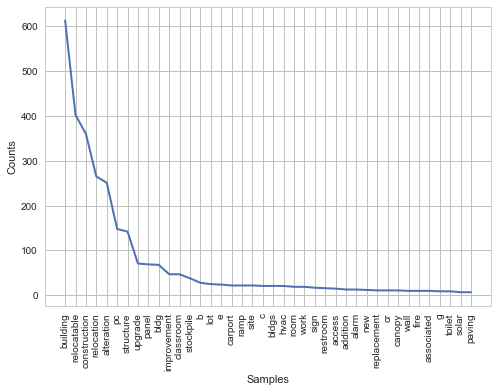

In [24]:
#Find the 50 most common words
fdist1 = FreqDist(corp)
fdist1.most_common(30)
fdist1.plot(40)

In [32]:
gym = [thing for thing in corp if "gym" in thing]
print "Number of Gyms", len(gym)

lib = [thing for thing in corp if "library" in thing]
print "Number of Libraries", len(lib)

sci = [thing for thing in corp if "science" in thing]
print "Number of Science Facilities", len(sci)

Number of Gyms 4
Number of Libraries 1
Number of Science Facilities 2


# Overspending
Let's look at how accurate the initial cost estimate for school projects are- do these projects tend to go over or underbudget? The histogram reveals that many projects tend to slightly overestimate how much they will cost, a certain amount of projects go massively over cost. It is these outliers that highly skew the mean overspending above the median overspending. 

The graph of spending over time has a shape similar to that of overall spending over time. However, the peak appears in 2015 rather than in 2005 like in spending over time, showing that over spending does not exactly follow spending. 

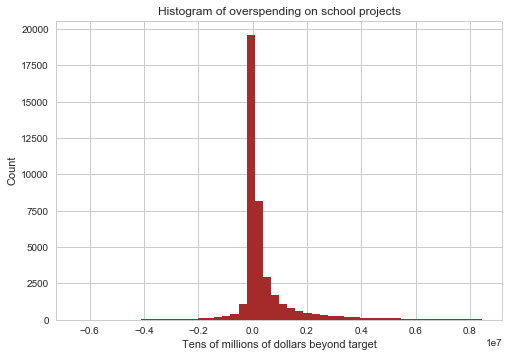

('Mean equals $', 931374.4500160746)
('Median equals $', 57312.59999999998)


In [12]:
school_data["overspending"] = school_data["calculated_cost"]-school_data["CPI_estamount"]

over = school_data["overspending"].dropna()
plt.hist(over[abs(over - np.mean(over)) < 1.5 * np.std(over)], bins = 50, color = "brown")
plt.title("Histogram of overspending on school projects")
plt.xlabel(r"Tens of millions of dollars beyond target")
plt.ylabel("Count")
plt.show()


#The average project:
print("Mean equals $", school_data["overspending"].mean())
#tends to overspend the estimated cost by $770,000. However, this is not a great representation
#due to a handful of projects that went way over. The median:
print("Median equals $", school_data["overspending"].median())
#is only $7000 overbudget

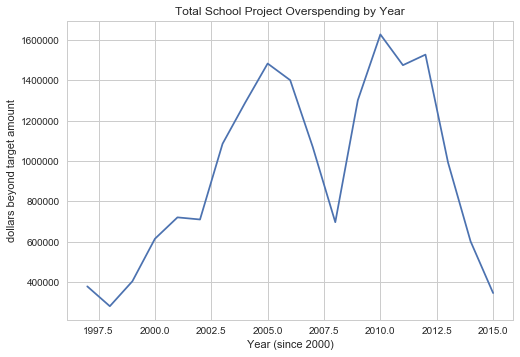

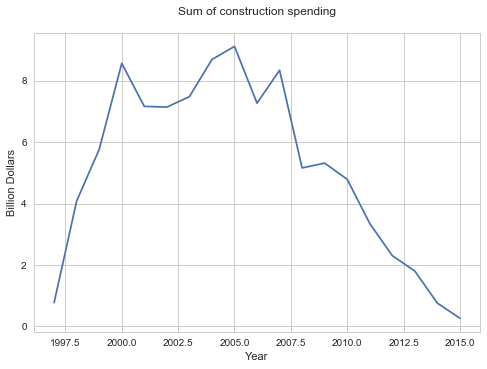

In [49]:
#Let's graph overspending over time
not16 = school_data["yr_op1"] != 2016
school_dat = school_data[not16]
overspend = {}
for i in set(school_dat["yr_op1"]):
    w = school_dat[school_dat.yr_op1==i]
    overspend[i] = w["overspending"].mean()

o = pd.DataFrame(list(overspend.items()))
plt.title("Total School Project Overspending by Year")
plt.plot(o[0], o[1])
plt.xlabel(r"Year (since 2000)")
plt.ylabel("dollars beyond target amount")
plt.show()

plt.plot(collapse_year.calculated_cost.sum()/1000000000)
plt.title("Sum of construction spending\n")
plt.ylabel("Billion Dollars")
plt.xlabel("Year")

# Share of Project Costs to Students#
In order to dig deeper into how school construction spending varies across the racial demographics of students, I made a metric called 'dollars to students,' which accounts for both the size of the project and the number of students served by it. I multiplied the total cost of a school's project by the percent makeup of each race. I then summed all of those numbers for each year, and divided it by the total number of students in each demographic for that year.

The first graph shows this metric as a bar graph for each year, and the second graph shows it as a line graph. Each graph shows that black students have received the most dollars in construction spending over the years. 

/Users/SophieMcG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/SophieMcG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


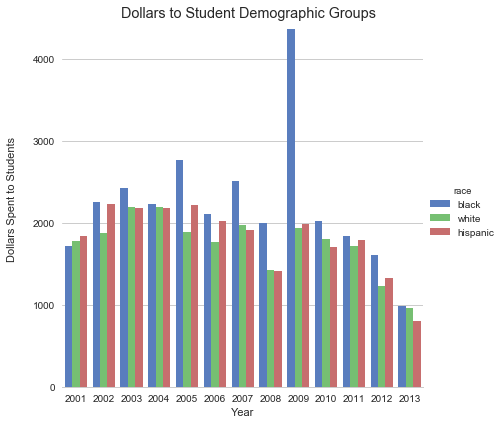

In [11]:
#I now attempt to make my 'share' metric
school_data["share_white"] = (school_data["perwhite"]*school_data["calculated_cost"])
school_data["share_black"] = (school_data["perblack"]*school_data["calculated_cost"])
school_data["share_hispanic"] = (school_data["perhisp"]*school_data["calculated_cost"])
school_data["share_lunch"] = (school_data["perlunch"]*school_data["calculated_cost"])
school_data['ctother'] = school_data['genenrollment'] - (school_data['ctblack'] + school_data['ctwhite'] + school_data['cthispanic'])
school_data['perother'] = school_data['ctother']/school_data['genenrollment']
school_data['share_other'] = (school_data['perother']*school_data['calculated_cost'])

#Dollars per black/white student

dollars_toblack = school_data.groupby('yr_op1').share_black.sum()/school_data.groupby('yr_op1').ctblack.sum()
dollars_towhite = school_data.groupby('yr_op1').share_white.sum()/school_data.groupby('yr_op1').ctwhite.sum()
dollars_tohispanic = school_data.groupby('yr_op1').share_hispanic.sum()/school_data.groupby('yr_op1').cthispanic.sum()
dollars_tolunch = school_data.groupby('yr_op1').share_lunch.sum()/school_data.groupby('yr_op1').ctReduced_lunch.sum()
dollars_toother = school_data.groupby('yr_op1').share_other.sum()/school_data.groupby('yr_op1').ctother.sum()

data = dollars_toblack.append(dollars_towhite)
data = data.append(dollars_tohispanic)

dollars_to = pd.DataFrame(data, columns = ["dollars_to"])
dollars_to['race'] = "black"

dollars_to[20:40]['race'] = "white"
dollars_to[41:]['race'] = "hispanic"
dollars_to.rename(index=str, columns={"0": "dollar_to"})
dollars_to['yr_op1'] = dollars_to.index
import seaborn as sns
sns.set(style="whitegrid")

relevant_years = ((dollars_to['yr_op1'] > 2000) & (dollars_to['yr_op1'] < 2014))    
    
g = sns.factorplot(x="yr_op1", y="dollars_to", hue="race", data=dollars_to[relevant_years],
                       size=6, kind="bar", palette="muted")
g.despine(left=True)
g.fig.suptitle("Dollars to Student Demographic Groups\n")
g.set_ylabels("Dollars Spent to Students\n")
g.set_xlabels("Year")

/Users/SophieMcG/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


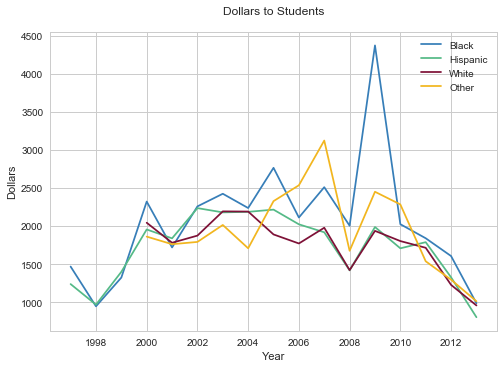

In [12]:
plt.plot(dollars_toblack, '#377EB8')
plt.plot(dollars_tohispanic, '#55BA87')
plt.plot(dollars_towhite, '#7E1137')
#plt.plot(dollars_tolunch, '#f2b61f')
plt.plot(dollars_toother, '#f2b61f')

plt.legend(('Black', 'Hispanic', 'White', "Other"))
plt.ylabel("Dollars")
plt.xlabel("Year")
plt.title("Dollars to Students\n")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.style.use("seaborn-bright")

plt.show()

# Modernization Projects
In California, there are 1.5 jobs to every 1 applicant seeking work in the STEM feild. For this reason, I decided it would be pertinent to analyze construction projects in the data that included the word 'modernization.' These projects are typically renovations to existing facilities in order to make classrooms more comfortable and up-to-date. The first graph is a plot of the percetage of students who receive modernization projects each year. 

This maxes out at only 3% per year. The second graph is a stackplot of the same metric, but gives a better visualization of how the share of who receives modernization projects changes over time. We don't see an obvious trend in which demographics are receiving the most modernization, but the plots hint at a slight favoring toward Hispanic  students between 2002 and 2006, and to white students between 2008 and 2011. 

/Users/SophieMcG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


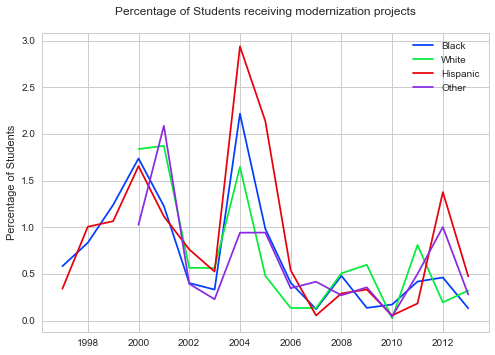

In [13]:
collapse_year_modern = school_data[modern].groupby(['yr_op1'])
collapse_year = school_data.groupby(['yr_op1'])

plt.title("Percentage of Students receiving modernization projects\n")
plt.plot((collapse_year_modern.ctblack.sum()/collapse_year.ctblack.sum())*100)
plt.plot((collapse_year_modern.ctwhite.sum()/collapse_year.ctwhite.sum())*100)
plt.plot((collapse_year_modern.cthispanic.sum()/collapse_year.cthispanic.sum())*100)
plt.plot(calc_other(collapse_year_modern) / calc_other(collapse_year)*100)
#plt.plot((collapse_year_modern.ctReduced_lunch.sum()/collapse_year.ctReduced_lunch.sum())*100)
plt.ylabel("Percentage of Students")
plt.legend(('Black', 'White', 'Hispanic', 'Other'))
plt.show()


20


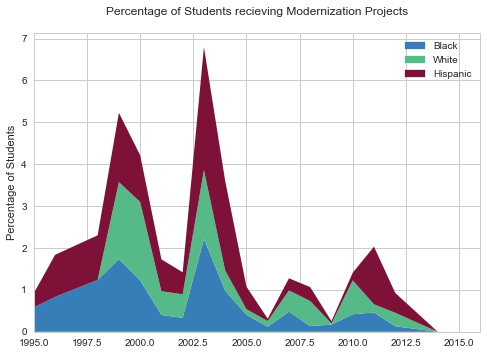

In [14]:
from scipy.io import loadmat

black = array((collapse_year_modern.ctblack.sum()/collapse_year.ctblack.sum())*100)
black = np.nan_to_num(black)
white = array((collapse_year_modern.ctwhite.sum()/collapse_year.ctwhite.sum())*100)
white = np.nan_to_num(white)
hispanic = array((collapse_year_modern.cthispanic.sum()/collapse_year.cthispanic.sum())*100)
hispanic = np.nan_to_num(hispanic)
overall = array((collapse_year_modern.genenrollment.sum()/collapse_year.genenrollment.sum())*100)
overall = np.nan_to_num(overall)

years = [1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2014, 2015, 2016]
plt.stackplot(years,
          [black, white, hispanic], colors=['#377EB8','#55BA87','#7E1137'])
plt.xlim(1995, 2016)
plt.title("Percentage of Students recieving Modernization Projects\n")
plt.ylabel("Percentage of Students")
# creating the legend manually
plt.legend([mpatches.Patch(color='#377EB8'),  
            mpatches.Patch(color='#55BA87'), 
            mpatches.Patch(color='#7E1137')], 
           ['Black','White','Hispanic'])
plt.show()

# Solar Panel Projects
Another category of particular interest is solar projects, which governor Jerry Brown has intended to popularize in public schools. Apart from a slump in 2012, solar panels in schools have indeed been becoming more popular. Interestingly, the schools that build solar panels tend to have less students. TALK ABOUT EACH OF THE THREE GRAPHS

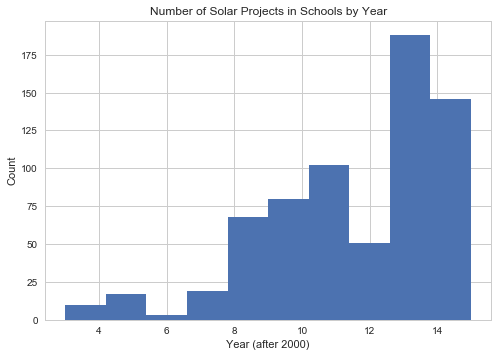

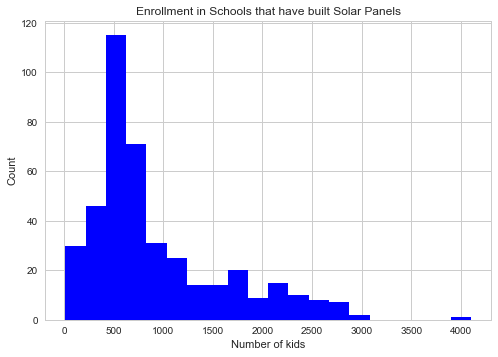

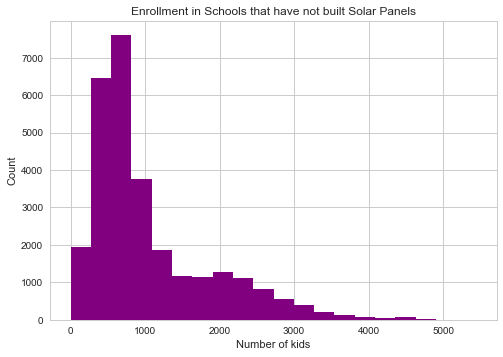

(920.2870813397129, 1047.990411436541)
Testing for equal means in Solar vs. non-Solar school enrollment: p-value = (0.0014877324881297609,)


In [14]:
solar = school_data[school_data["projectscope"].str.contains('SOLAR')==True]
plt.hist(solar['yr_opened'].dropna(), bins = 10)
plt.title("Number of Solar Projects in Schools by Year")
plt.xlabel(r"Year (after 2000)")
plt.ylabel("Count")
plt.show()
#There are more solar projects over time

plt.hist(solar["genenrollment"].dropna(), bins = 20, color = "blue")
plt.title("Enrollment in Schools that have built Solar Panels")
plt.xlabel(r"Number of kids")
plt.ylabel("Count")
plt.show()
plt.hist(school_data["genenrollment"].dropna(), bins = 20, color = "purple")
plt.title("Enrollment in Schools that have not built Solar Panels")
plt.xlabel(r"Number of kids")
plt.ylabel("Count")
plt.show()
#Schools that build solar projects tend to have less kids
#Their mean number of students are:
print(solar["genenrollment"].mean(), school_data["genenrollment"].mean())

# A t-test: 
from scipy.stats import ttest_ind
print("Testing for equal means in Solar vs. non-Solar school enrollment: p-value = " + str(ttest_ind(solar["genenrollment"].dropna(),school_data["genenrollment"].dropna())[1:2]))
#The test rejects at the 5% significance level

# Going Forward
California's school construction data is nebulous and volatile, and it is difficult to extract a clear trend from the data. Often times, it seems that the 20 years of data I have access to only provdies a tiny moment in the large-scale trends of these expensive spending items. I need to develop more creative ways to subset the data and get to the root cause of some of the trends I saw. 

For example, a plot of the number new schools built and number of modernization projects shows a mirrored trend over time. What causes this? Do districts decide to build new schools and modernize others at the same time? Is one county or region more likely to approve construction spending if they are sold on modernization projects? I need to explore spending actions on a district level to see how these miniature governments operate and drive overall trends. 

I am curious as to how construction spending correlates with other types of spending, and whether it is effective in increasing student success. Previous papers have shown mixed reviews as to whether new facilities improve student learning or staff morale. 

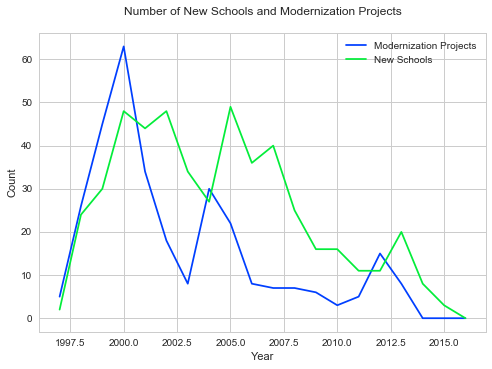

In [15]:
plt.plot(collapse_year.modern.sum())
plt.plot(collapse_year.new.sum())
plt.title("Number of New Schools and Modernization Projects\n")
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(('Modernization Projects', 'New Schools'))
plt.show()